# Project fruit
The goal of this project is classifying fruits and determining its ripeness

In [22]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import datetime
import os
# import pandas as pd
# import seaborn as sns
# from keras.models import load_model
from keras.models import Sequential 
from keras.layers import Dropout, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import img_to_array, load_img

# Use GPU (needed?)
os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true'

physical_devices = tf.config.experimental.list_physical_devices('GPU')
for physical_device in physical_devices:
    tf.config.experimental.set_memory_growth(physical_device, True)

# Loads Tensorboard
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [23]:
# Clear any logs from previous runs
!rm -rf ./logs/

'rm' is not recognized as an internal or external command,
operable program or batch file.


In [24]:
train_path_360 = 'C:/Users/emanu/Documents/Programming/Python/Project/ADL/data/fruits-360_mod/Training'
test_path_360 = 'C:/Users/emanu/Documents/Programming/Python/Project/ADL/data/fruits-360_mod/Test'

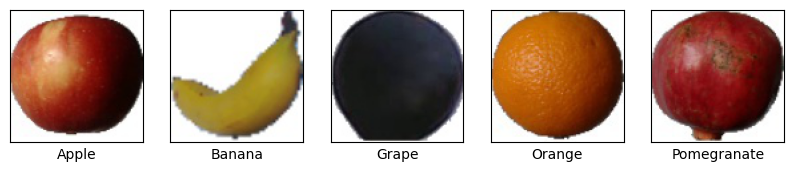

In [25]:
# Insert fruits that you want to inspect
fruits = ['Apple', 'Banana', 'Grape', 'Orange', 'Pomegranate']
# Which image in the folder
fruitnr = 1

plt.figure(figsize=(10,10))
for i in range(len(fruits)):    
    img = load_img(train_path_360 + "/{fruit:}/{filename:}".format(fruit=fruits[i], filename=os.listdir(train_path_360 + '/' + fruits[i])[fruitnr-1]))
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img)
    plt.xlabel(fruits[i])
plt.show()

In [26]:
img = img_to_array(img)
img.shape

(100, 100, 3)

In [27]:
img_height, img_width, channels = 100, 100, 3

VGG16 = tf.keras.applications.vgg16.VGG16(include_top=False, input_shape=(img_height,img_width,channels))

# Get the list of subdirectories
subdirectories = [f.path for f in os.scandir(train_path_360) if f.is_dir()]

# Count the number of subdirectories
num_classes = len(subdirectories)

model = Sequential()

model.add(VGG16)

# Lower dropout rate?
model.add(Flatten())
model.add(Dense(3*384, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(3*128, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 3, 3, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 4608)              0         
                                                                 
 dense_3 (Dense)             (None, 1152)              5309568   
                                                                 
 dropout_2 (Dropout)         (None, 1152)              0         
                                                                 
 dense_4 (Dense)             (None, 384)               442752    
                                                                 
 dropout_3 (Dropout)         (None, 384)               0         
                                                                 
 dense_5 (Dense)             (None, 5)                

In [38]:
model.compile(loss="categorical_crossentropy",
              optimizer = "Adam",
              metrics = ["Accuracy", "Recall", "Precision"])

log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

In [39]:
# Choose transformations
train_datagen = ImageDataGenerator(
                    rescale = 1./255,
                    shear_range = 0.3,
                    horizontal_flip=True,
                    vertical_flip=False,
                    zoom_range = 0.3,
                    validation_split=0.2
                    )
test_datagen  = ImageDataGenerator(rescale = 1./255)

# Kind of like DataLoader
train_generator = train_datagen.flow_from_directory(train_path_360,
                                                    target_size = (100,100),
                                                    batch_size = 32,
                                                    color_mode = "rgb",
                                                    class_mode = "categorical",
                                                    subset = "training")
validation_generator = train_datagen.flow_from_directory(train_path_360,
                                                    target_size = (100, 100),
                                                    batch_size = 32,
                                                    color_mode = "rgb",
                                                    class_mode = "categorical",
                                                    subset = "validation")
test_generator = test_datagen.flow_from_directory(test_path_360,
                                                    target_size = (100,100),
                                                    batch_size = 32,
                                                    color_mode = "rgb",
                                                    class_mode = "categorical")

Found 8908 images belonging to 5 classes.
Found 2225 images belonging to 5 classes.
Found 3659 images belonging to 5 classes.


In [ ]:
# Place to save the model weights
checkpoint_path = "C:/Users/emanu/Documents/Programming/Python/Project/ADL/models/model_360.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=False,
                                                 save_best_only=True,
                                                 verbose=1)

In [40]:
hist = model.fit(train_generator,
                 epochs = 10,
                 validation_data = validation_generator,
                 callbacks=[tensorboard_callback, cp_callback])

Epoch 1/10
279/279 [==============================] - 550s 2s/step - loss: 0.7995 - Accuracy: 0.7865 - recall: 0.7337 - precision: 0.8274 - val_loss: 0.5351 - val_Accuracy: 0.7942 - val_recall: 0.7879 - val_precision: 0.8481
Epoch 2/10
279/279 [==============================] - 534s 2s/step - loss: 0.2479 - Accuracy: 0.9161 - recall: 0.9004 - precision: 0.9282 - val_loss: 0.2100 - val_Accuracy: 0.9155 - val_recall: 0.8971 - val_precision: 0.9375
Epoch 3/10
279/279 [==============================] - 549s 2s/step - loss: 0.2246 - Accuracy: 0.9337 - recall: 0.9221 - precision: 0.9428 - val_loss: 0.6897 - val_Accuracy: 0.8234 - val_recall: 0.7897 - val_precision: 0.8253
Epoch 4/10
279/279 [==============================] - 537s 2s/step - loss: 0.4974 - Accuracy: 0.8492 - recall: 0.8055 - precision: 0.8841 - val_loss: 0.4700 - val_Accuracy: 0.8288 - val_recall: 0.8049 - val_precision: 0.8444
Epoch 5/10
279/279 [==============================] - 532s 2s/step - loss: 0.2934 - Accuracy: 0.9024

In [41]:
# Launces application 'Tensorboard' that compiles all data from code-run in file path 'logs/fit'
%tensorboard --logdir logs/fit  --port=8008 # 6006

In [47]:
# Evaluate the model
test_acc = model.evaluate(test_generator, verbose=2)

115/115 - 52s - loss: 0.1026 - Accuracy: 0.9738 - recall: 0.9713 - precision: 0.9761 - 52s/epoch - 453ms/step
